In [84]:
import pandas as pd
import nltk

In [85]:
# ambil rule probabilistic
df = pd.read_csv("rules/probabilistic_rules.csv")
df

,production,lhs,sum_production,sum_lhs,probability
0,Adj -> 'abulan',Adj,0.1,16.5,0.006061
1,Adj -> 'ageng',Adj,0.1,16.5,0.006061
2,Adj -> 'akeh',Adj,0.1,16.5,0.006061
3,Adj -> 'alit',Adj,0.1,16.5,0.006061
4,Adj -> 'arang',Adj,0.1,16.5,0.006061
...,...,...,...,...,...
19706,Verb -> 'ulung',Verb,2.1,360.2,0.005830
19707,Verb -> 'uning',Verb,1.1,360.2,0.003054
19708,Verb -> 'urati',Verb,1.1,360.2,0.003054
19709,Verb -> 'wantah',Verb,1.1,360.2,0.003054


In [86]:
# tulis rule cfg
grammar_cfg = ""
for prod in df["production"]:
  grammar_cfg += f"{prod}\n"
grammar_cfg = nltk.CFG.fromstring(grammar_cfg)
grammar_cfg._start = nltk.Nonterminal("K")
parser_cfg = nltk.ChartParser(grammar_cfg)

In [87]:
# # tulis rule pcfg
# grammar_pcfg = ""
# for prod, prob in zip(df["production"], df["probability"]):
#   grammar_pcfg += f"{prod} [{prob}]\n"
# grammar_pcfg = nltk.PCFG.fromstring(grammar_pcfg)
# grammar_pcfg._start = nltk.Nonterminal("K")
# parser_pcfg = nltk.ViterbiParser(grammar_pcfg)

In [88]:
# tulis kalimat
sentence = input("Enter your Balinese sentence: ")
# sentence = "meme meli nasi"
sentence = sentence.lower().split()

In [89]:
# list(parser_cfg.parse(sentence))

In [90]:
# len(list(parser_cfg.parse(sentence)))

In [91]:
# hitung probabilistic dan memilih hasil parsing dengan prob tertinggi
result = pd.DataFrame({"tree": list(parser_cfg.parse(sentence)), "probability": [1 for _ in range(len(list(parser_cfg.parse(sentence))))]})
for i, value_i in result.iterrows():
  for j in value_i["tree"].productions():
    for k, value_k in df.iterrows():
      if nltk.CFG.fromstring(value_k["production"]).productions()[0] == j:
        result["probability"][i] *= value_k["probability"]
        continue
result

C:\Users\Adi\AppData\Local\Temp\ipykernel_8148\3809212652.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result["probability"][i] *= value_k["probability"]
C:\Users\Adi\AppData\Local\Temp\ipykernel_8148\3809212652.py:7: SettingWithCopyW

,tree,probability
0,"[[[(Noun meme)]], [[(Verb megae)]]]",3.135816e-13
1,"[[[(Noun meme)]], [[(Noun megae)]]]",7.845602e-12


In [92]:
# merangking rules berdasarkan probability yang dihasilkan
result = result.sort_values(by='probability', ascending=False).reset_index(drop=True)
result

,tree,probability
0,"[[[(Noun meme)]], [[(Noun megae)]]]",7.845602e-12
1,"[[[(Noun meme)]], [[(Verb megae)]]]",3.135816e-13


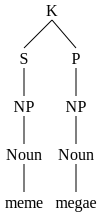

In [93]:
result["tree"][0]